In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("C:/Users/USER/Documents/Github/Machine Learning/datasets/Student_Performance.csv")

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
print("\nData Info.:")
print(df.info())

print("\nData Shape:")
print(df.shape)


Data Info.:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

Data Shape:
(10000, 6)


In [6]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [7]:
df.duplicated().sum()

np.int64(127)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
encoder = LabelEncoder()
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])

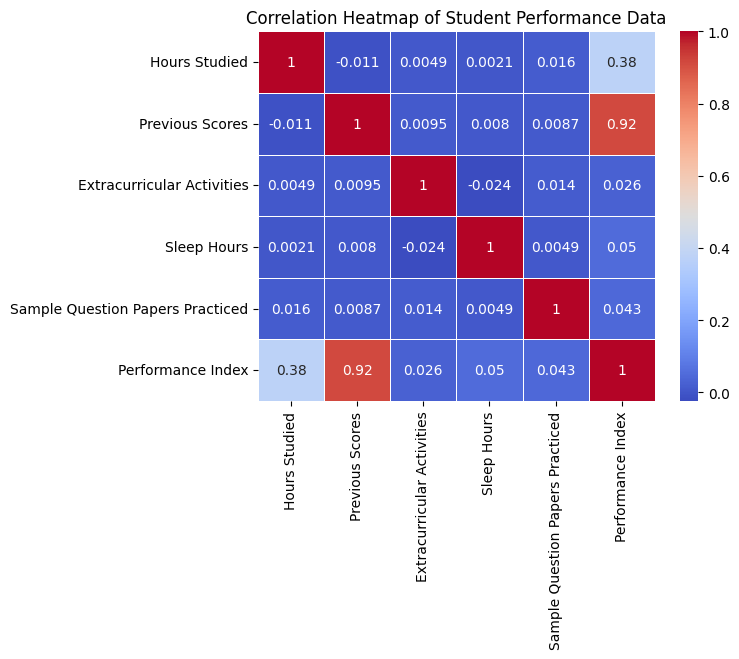

In [11]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Student Performance Data")
plt.show()

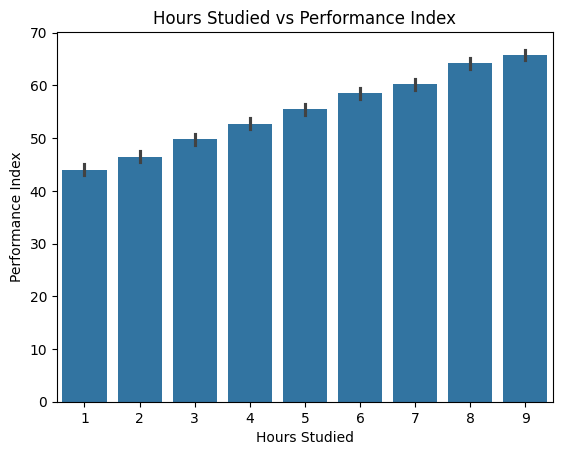

In [12]:
sns.barplot(data=df, x="Hours Studied", y="Performance Index")
plt.title("Hours Studied vs Performance Index")
plt.show()

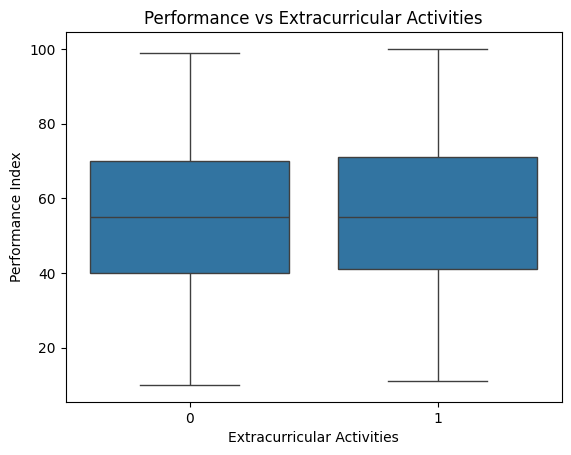

In [13]:
sns.boxplot(data=df, x="Extracurricular Activities", y="Performance Index")
plt.title("Performance vs Extracurricular Activities")
plt.show()

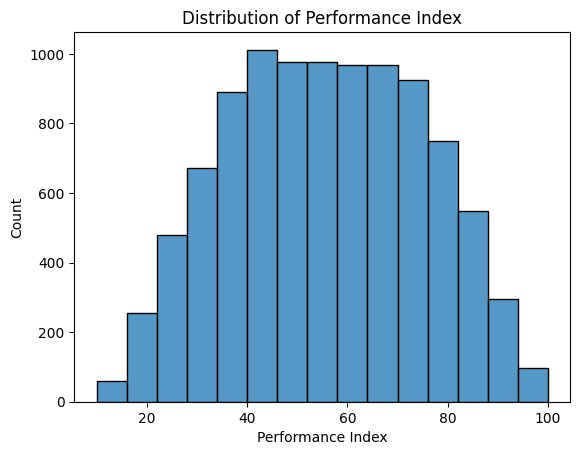

In [14]:
sns.histplot(df["Performance Index"], bins=15)
plt.title("Distribution of Performance Index")
plt.show()

In [15]:
X=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [25]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [26]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

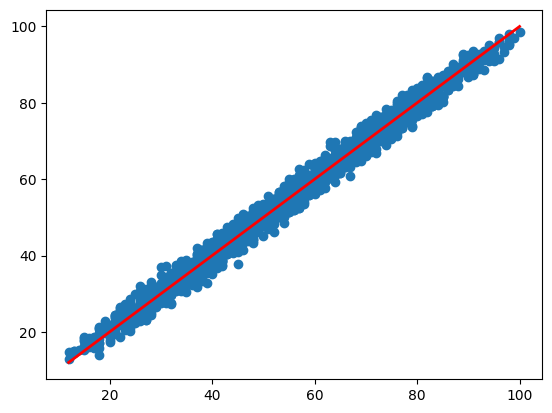

In [24]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.show()

In [19]:
MSE = mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE) : ",MSE)

r2 = r2_score(y_test,y_pred)
print("R2 Score : ",r2)

Mean Squared Error (MSE) :  4.153400841062853
R2 Score :  0.988233187583424


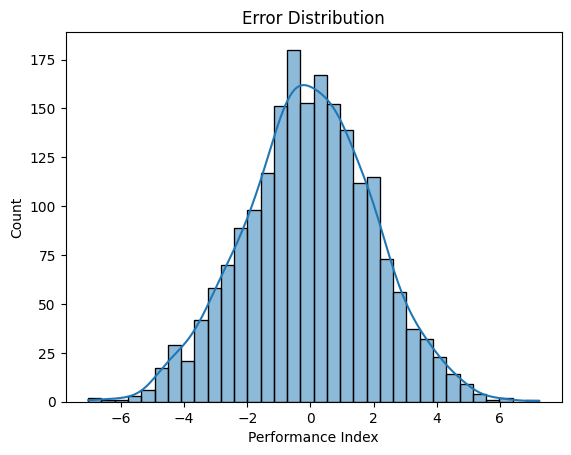

In [21]:
# Residuals distribution plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Error Distribution")
plt.show()